## Segmentation

In [2]:
!pip install nltk

     ---------------------------------------- 1.5/1.5 MB 1.8 MB/s eta 0:00:00
     -------------------------------------- 267.9/267.9 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB 2.8 MB/s eta 0:00:00


In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

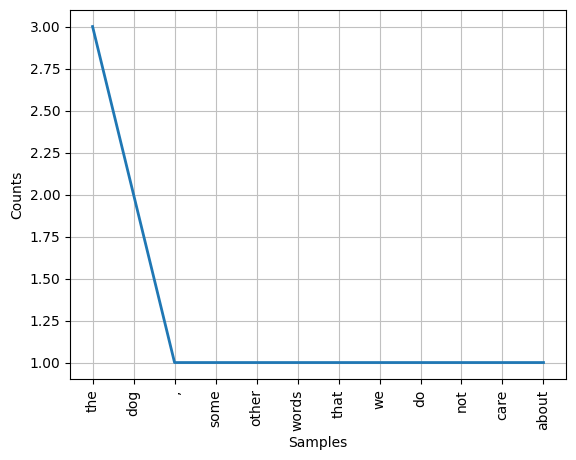

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [4]:
from nltk.tokenize import word_tokenize

# 測試字句
sent = "the the the dog, dog some other words that we do not care about"

# 取出每個單字
list = [word for word in word_tokenize(sent)]
# 得到結果為 ['the', 'the', 'the', 'dog', ',', 'dog', 'some', 'other', 'words', 'that', 'we', 'do', 'not', 'care', 'about']

# 去除重複，並排序
vacabulary = sorted(set(list)) 
# 得到結果為 [',', 'about', 'care', 'do', 'dog', 'not', 'other', 'some', 'that', 'the', 'we', 'words']

# 求得每個單字的出現頻率
import nltk
freq = nltk.FreqDist(list)
# 得到結果為 FreqDist({'the': 3, 'dog': 2, 'care': 1, 'some': 1, 'other': 1, ',': 1, 'we': 1, 'that': 1, 'words': 1, 'about': 1, ...})

# 作圖
freq.plot()

In [5]:
stopwords = [",", "the"]

# 去除 Stop Words
list = [word for word in word_tokenize(sent) if word not in stopwords]
# 得到結果為 ['dog', 'dog', 'some', 'other', 'words', 'that', 'we', 'do', 'not', 'care', 'about']
print(list)

['dog', 'dog', 'some', 'other', 'words', 'that', 'we', 'do', 'not', 'care', 'about']


In [6]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


True

In [7]:
# 載入WordNet語料庫
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

# 要指定單字詞性(pos)
print(wnl.lemmatize('ate', pos = 'v')) # 得到eat
print(wnl.lemmatize('better', pos = 'a')) # 得到good
print(wnl.lemmatize('dogs')) # 得到dog

# 若要自動取得單字詞性(pos)，請參考 http://www.zmonster.me/2016/01/21/lemmatization-survey.html。

eat
good
dog


## Part of Speech

In [8]:
import nltk
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
nltk.download('ieer')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.
[nltk_data] Downloading package ieer to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\ieer.zip.


True

In [9]:
import nltk
from nltk import ne_chunk
from nltk import word_tokenize

sent = "Mark is studying at Stanford University in California"
# 取得詞性，並辨識 命名實體識別
print(ne_chunk(nltk.pos_tag(word_tokenize(sent)), binary = False))

# download NLTK語料庫 -> NYT_19980315
print("NER...........")
import re
IN = re.compile(r'.*\bin\b(?!\b.+ing)')
for doc in nltk.corpus.ieer.parsed_docs('NYT_19980315'):
    for rel in nltk.sem.extract_rels('ORG', 'LOC', doc, corpus = 'ieer', pattern = IN):
        print(nltk.sem.rtuple(rel))

(S
  (PERSON Mark/NNP)
  is/VBZ
  studying/VBG
  at/IN
  (ORGANIZATION Stanford/NNP University/NNP)
  in/IN
  (GPE California/NNP))
NER...........
[ORG: 'WHYY'] 'in' [LOC: 'Philadelphia']
[ORG: 'McGlashan &AMP; Sarrail'] 'firm in' [LOC: 'San Mateo']
[ORG: 'Freedom Forum'] 'in' [LOC: 'Arlington']
[ORG: 'Brookings Institution'] ', the research group in' [LOC: 'Washington']
[ORG: 'Idealab'] ', a self-described business incubator based in' [LOC: 'Los Angeles']
[ORG: 'Open Text'] ', based in' [LOC: 'Waterloo']
[ORG: 'WGBH'] 'in' [LOC: 'Boston']
[ORG: 'Bastille Opera'] 'in' [LOC: 'Paris']
[ORG: 'Omnicom'] 'in' [LOC: 'New York']
[ORG: 'DDB Needham'] 'in' [LOC: 'New York']
[ORG: 'Kaplan Thaler Group'] 'in' [LOC: 'New York']
[ORG: 'BBDO South'] 'in' [LOC: 'Atlanta']
[ORG: 'Georgia-Pacific'] 'in' [LOC: 'Atlanta']


## Bag of Word

In [1]:
import collections

maxlen = 1000
MAX_FEATURES = 10
stop_words = ['the', 'to', 'a', 'and', 'of', 'in', 'on', 'for',
              'that', 'with', 'is', 'as', 'could', 'its', 'this',
              'other', 'an', 'have', 'more', 'at',]
word_freqs = collections.Counter()
with open('./news.txt', 'r+', encoding = 'UTF-8') as f:
    for line in f:
        words = line.lower().split(' ')
        if len(words) > maxlen:
            maxlen = len(words)
        for word in words:
            if not (word in stop_words):
                word_freqs[word] += 1

print('max_len ', maxlen)
print('nb_words ', len(word_freqs))
print(word_freqs.most_common(MAX_FEATURES))

max_len  1000
nb_words  658
[('google', 18), ('ai', 14), ('data', 13), ('google’s', 12), ('medical', 12), ('health', 9), ('patient', 8), ('company', 6), ('health-care', 6), ('information', 6)]


## TF-IDF(Term Frequency-Inverse Document Frequency)

In [11]:
documents = (
"The sky is blue",
"The sun is bright",
"The sun in the sky is bright",
"We can see the shining sun, the bright sun"
)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
print(tfidf_matrix.shape)
print(tfidf_vectorizer.get_feature_names_out())
print(tfidf_matrix.toarray())

(4, 11)
['blue' 'bright' 'can' 'in' 'is' 'see' 'shining' 'sky' 'sun' 'the' 'we']
[[0.65919112 0.         0.         0.         0.42075315 0.
  0.         0.51971385 0.         0.34399327 0.        ]
 [0.         0.52210862 0.         0.         0.52210862 0.
  0.         0.         0.52210862 0.42685801 0.        ]
 [0.         0.3218464  0.         0.50423458 0.3218464  0.
  0.         0.39754433 0.3218464  0.52626104 0.        ]
 [0.         0.23910199 0.37459947 0.         0.         0.37459947
  0.37459947 0.         0.47820398 0.39096309 0.37459947]]


In [12]:
from sklearn.metrics.pairwise import cosine_similarity
print (cosine_similarity(tfidf_matrix[0], tfidf_matrix))

[[1.         0.36651513 0.52305744 0.13448867]]


In [13]:
# 徑度換算成角度

import math
# This was already calculated on the previous step, so we just use the value
cos_sim = -1
angle_in_radians = math.acos(cos_sim)
print(math.degrees(angle_in_radians))

180.0


## GloVe-6B-100d
glove.6B.100d.txt資料檔  
6B -> 使用60億Token語料庫訓練(共包含40K字彙)  
100d -> 100個維度

In [2]:
with open('glove.6B.100d.txt', mode = 'r', encoding = 'utf-8-sig') as f:
    data = f.readlines()

In [3]:
# check all of lines
len(data)

400000

In [4]:
idx = 500
data[idx].replace('\n', '').split(' ')[0], \
len(data[idx].replace('\n', '').split(' ')[1:]), 

('working', 100)

## Sklearn-countervector-中文斷詞切字

In [1]:
!pip install jieba

     ---------------------------------------- 19.2/19.2 MB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314474 sha256=9b0afc689c33e5a169f13a9c72ae89977bb69baf6ef5eebae8446cd93f5bf67c
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\c9\69\31\d56d90b22a1777b0b231e234b00302a55be255930f8bd92dcd
Successfully built jieba


In [2]:
import jieba
# list(jieba.cut(sentence = '這是第一篇文章.'))
corpus = '''MSN是由微軟公司架設的入口網站及資訊服務，於1995年8月24日首度以網際網路服務供應商隨著Windows 95一起問世'''
list(jieba.cut(sentence = corpus))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.960 seconds.
Prefix dict has been built successfully.


['MSN',
 '是',
 '由',
 '微軟',
 '公司',
 '架設',
 '的',
 '入口',
 '網站',
 '及',
 '資訊',
 '服務',
 '，',
 '於',
 '1995',
 '年',
 '8',
 '月',
 '24',
 '日',
 '首度',
 '以',
 '網際',
 '網路',
 '服務供',
 '應商',
 '隨著',
 'Windows',
 ' ',
 '95',
 '一起',
 '問世']

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
corpus = [
    '這是第一篇文章',
    '這文章是第二篇',
    '並且這是第三篇',
    '這是第一篇文章嗎',
]
words = []
for c in corpus :
    words.extend(list(jieba.cut(sentence = c )))
np.unique(words)

array(['並且', '嗎', '文章', '是', '第一篇', '第三篇', '第二篇', '這', '這是'], dtype='<U3')

In [4]:
# 手動轉換成 
# Sentence to vector 
# [[0 1 1 1 0 0 1 0 1]
#  [0 2 0 1 0 1 1 0 1]
#  [1 0 0 1 1 0 1 1 1]
#  [0 1 1 1 0 0 1 0 1]]

list(jieba.cut(sentence = '這是第一篇文章 Microsoft windows 10'))

['這是', '第一篇', '文章', ' ', 'Microsoft', ' ', 'windows', ' ', '10']

In [5]:
# ['這是', '第一篇', '文章'] 
# ['並且', '嗎', '文章', '是', '第一篇', '第三篇', '第二篇', '這', '這是']
# [ 0   ,   0,    1,     0,    1,        0,       0,        0,   1]
zh_all = np.unique( words )
zh_cv = np.zeros([4, 9]).astype('int')

# 字頻分析表
# 從文章中取出每一kk=序號，vv=每一條文章內容
for kk,vv in enumerate(corpus):
    # 針對vv，每一個文章內容去切字
    for v in list(jieba.cut(sentence = vv)):
        # 針對每一個單字進行轉換1 
        pos = np.where(zh_all == v)
        zh_cv[kk, pos] = 1
zh_cv

array([[0, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 0, 0, 1]])

In [6]:
# enumerate
for i in enumerate(range(5, 8)):
    print(i)

(0, 5)
(1, 6)
(2, 7)


In [7]:
zh_cv

array([[0, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 0, 0, 1]])

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(zh_cv[0].reshape(1, -1), zh_cv).ravel()

array([1.        , 0.28867513, 0.33333333, 0.8660254 ])

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

corpus = [
    '這是第一篇文章',
    '這文章是第二篇',
    '並且這是第三篇',
    '這是第一篇文章嗎',
]
words = []
for c in corpus :
    words.append(' '.join(list(jieba.cut(sentence = c ))))

print(words)

['這是 第一篇 文章', '這 文章 是 第二篇', '並且 這是 第三篇', '這是 第一篇 文章 嗎']


In [10]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(zh_cv)
tfidf.toarray().shape # 四篇文章所有的單字 
tfidf.toarray() # 該部分類似CountVectorizer()，顯示單字出現的頻率，加上權重

array([[0.        , 0.        , 0.53256952, 0.        , 0.65782931,
        0.        , 0.        , 0.        , 0.53256952],
       [0.        , 0.        , 0.34578314, 0.5417361 , 0.        ,
        0.        , 0.5417361 , 0.5417361 , 0.        ],
       [0.64450299, 0.        , 0.        , 0.        , 0.        ,
        0.64450299, 0.        , 0.        , 0.41137791],
       [0.        , 0.64065543, 0.40892206, 0.        , 0.5051001 ,
        0.        , 0.        , 0.        , 0.40892206]])

In [11]:
base = 0
similarity_subject = np.array(cosine_similarity(tfidf[base], tfidf)).ravel()
similarity_subject
# array([1.        , 0.28867513, 0.33333333, 0.8660254 ])

array([1.        , 0.18415356, 0.21908734, 0.76782851])

## WordCloud

In [12]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 1.3 MB/s eta 0:00:00


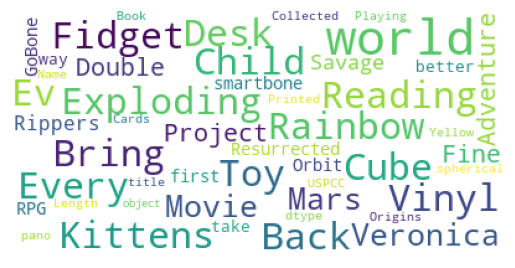

In [14]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# mpl.rcParams['figure.figsize'] = (8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size'] = 12                  #10 
mpl.rcParams['savefig.dpi'] = 100               #72 
mpl.rcParams['figure.subplot.bottom'] = .1 

stopwords = set(STOPWORDS)
data = pd.read_csv("./most_backed.csv")

wordcloud = WordCloud(
      background_color = 'white',
      stopwords = stopwords,
      max_words = 200,
      max_font_size = 40, 
      random_state = 42
     ).generate(str(data['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig("word1.png", dpi=900)

## AzureCognitiveService
"The refresh token has expired due to inactivity. Hence unable login using Identity Management via DefaultAzureCredential object on Visual Studio to connect to Azure Cloud Resources."

In [15]:
# 利用雲端進行斷詞切字
# https://docs.microsoft.com/en-us/azure/cognitive-services/language-service/key-phrase-extraction/quickstart?pivots=programming-language-python
# https://docs.microsoft.com/en-us/azure/cognitive-services/language-service/key-phrase-extraction/language-support
# Sample code 
# https://github.com/Azure/azure-sdk-for-python/tree/main/sdk/textanalytics/azure-ai-textanalytics/samples
# https://docs.microsoft.com/en-us/python/api/overview/azure/ai-textanalytics-readme?view=azure-python
!pip install azure-ai-textanalytics==5.1.0

     -------------------------------------- 153.2/153.2 kB 2.3 MB/s eta 0:00:00
     -------------------------------------- 173.9/173.9 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 85.4/85.4 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 41.7/41.7 kB 2.0 MB/s eta 0:00:00


In [16]:
key = "a83d64fc5bfa43a78c6e92afed058774"
endpoint = "https://nlp0418.cognitiveservices.azure.com/"

from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

# Authenticate the client using your key and endpoint 
def authenticate_client():
    ta_credential = AzureKeyCredential(key)
    text_analytics_client = TextAnalyticsClient(
            endpoint = endpoint, 
            credential = ta_credential)
    return text_analytics_client

client = authenticate_client()

def key_phrase_extraction_example(client):

    try:
        #documents = ["My cat might need to see a veterinarian and I also fix Windows 10 software."]
        documents = ["MSN是由微軟公司架設的入口網站及資訊服務，於1995年8月24日首度以網際網路服務供應商隨著Windows 95一起問世"]

        response = client.extract_key_phrases(documents = documents, language = "zh-hans")[0]

        if not response.is_error:
            print("\tKey Phrases:")
            for phrase in response.key_phrases:
                print("\t\t", phrase)
        else:
            print(response.id, response.error)

    except Exception as err:
        print("Encountered exception. {}".format(err))
        
key_phrase_extraction_example(client)

Encountered exception. (401) Access denied due to invalid subscription key or wrong API endpoint. Make sure to provide a valid key for an active subscription and use a correct regional API endpoint for your resource.
Code: 401
Message: Access denied due to invalid subscription key or wrong API endpoint. Make sure to provide a valid key for an active subscription and use a correct regional API endpoint for your resource.


In [18]:
# 情緒分析
from azure.core.credentials import AzureKeyCredential
from azure.ai.textanalytics import TextAnalyticsClient

credential = AzureKeyCredential("a83d64fc5bfa43a78c6e92afed058774")
endpoint = "https://eastus.api.cognitive.microsoft.com/"

text_analytics_client = TextAnalyticsClient(endpoint, credential)

documents = [
    "I did not like the restaurant. The food was somehow both too spicy and underseasoned. Additionally, I thought the location was too far away from the playhouse.",
    "The restaurant was decorated beautifully. The atmosphere was unlike any other restaurant I've been to.",
    "The food was yummy. :)"
]

response = text_analytics_client.analyze_sentiment(documents, language = "en")
result = [doc for doc in response if not doc.is_error]

for doc in result:
    print("Overall sentiment: {}".format(doc.sentiment))
    print("Scores: positive={}; neutral={}; negative={} \n".format(
        doc.confidence_scores.positive,
        doc.confidence_scores.neutral,
        doc.confidence_scores.negative,
            ))

ClientAuthenticationError: (401) Access denied due to invalid subscription key or wrong API endpoint. Make sure to provide a valid key for an active subscription and use a correct regional API endpoint for your resource.
Code: 401
Message: Access denied due to invalid subscription key or wrong API endpoint. Make sure to provide a valid key for an active subscription and use a correct regional API endpoint for your resource.